In [20]:
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, ZeroPadding2D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, SGD
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%reload_ext nb_black

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Load Data

In [2]:
# Load CIFAR10 data
(X_train, y_train), (_, _) = keras.datasets.cifar10.load_data()

<IPython.core.display.Javascript object>

In [3]:
X_train = X_train[y_train.flatten() == 2]

<IPython.core.display.Javascript object>

In [4]:
X_train.shape

(5000, 32, 32, 3)

<IPython.core.display.Javascript object>

In [5]:
# Input shape
img_rows = 32
img_cols = 32
channels = 3

img_shape = (img_rows, img_cols, channels)
latent_dim = 100

<IPython.core.display.Javascript object>

In [9]:
def show_imgs(epoch):
    r, c = 4, 4
    noise = np.random.normal(0, 1, (r * c, latent_dim))
    gen_imgs = generator.predict(noise)

    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(
                gen_imgs[cnt, :, :,]
            )
            axs[i, j].axis("off")
            cnt += 1
    plt.show()
    plt.close()

<IPython.core.display.Javascript object>

In [10]:
def show_losses(losses):
    losses = np.array(losses)

    fig, ax = plt.subplots()
    plt.plot(losses.T[0], label="Discriminator")
    plt.plot(losses.T[1], label="Generator")
    plt.title("Training Losses")
    plt.legend()
    plt.show()

<IPython.core.display.Javascript object>

## Create Model

In [6]:
def get_generator_model():

    model = Sequential()

    model.add(Dense(128 * 8 * 8, activation="relu", input_dim=latent_dim))
    model.add(Reshape((8, 8, 128)))

    model.add(UpSampling2D())

    model.add(Conv2D(filters=128, kernel_size=3, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))

    model.add(UpSampling2D())

    model.add(Conv2D(filters=64, kernel_size=3, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))

    model.add(Conv2D(filters=channels, kernel_size=3, padding="same"))
    model.add(Activation("tanh"))

    # Output image size = 32*32*3

    noise = Input(shape=latent_dim)
    img = model(noise)

    return Model(noise, img)

<IPython.core.display.Javascript object>

In [7]:
def get_discriminator_model():

    model = Sequential()

    model.add(
        Conv2D(
            filters=32, kernel_size=3, strides=2, input_shape=img_shape, padding="same"
        )
    )
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=64, kernel_size=3, strides=2, padding="same"))
    model.add(ZeroPadding2D(padding=((0, 1), (0, 1))))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=128, kernel_size=3, strides=2, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1, activation="sigmoid"))

    img = Input(shape=img_shape)
    prediction = model(img)

    discr_model = Model(img, prediction)

    discr_model.compile(
        loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5), metrics=["accuracy"]
    )

    return discr_model

<IPython.core.display.Javascript object>

In [8]:
discriminator = get_discriminator_model()

generator = get_generator_model()

noise = Input(shape=(latent_dim,))
img = generator(noise)

discriminator.trainable = False

prediction = discriminator(img)

combined_model = Model(noise, prediction)

combined_model.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5))

<IPython.core.display.Javascript object>

## Train

In [11]:
epochs = 15000
batch_size = 32
display_interval = 1000
losses = []

X_train = X_train / 127.5 - 1

# Ground truth
valid_labels = np.ones((batch_size, 1))
valid_labels += 0.05 * np.random.random(valid_labels.shape)

fake_labels = np.zeros((batch_size, 1))
fake_labels += 0.05 * np.random.random(fake_labels.shape)

<IPython.core.display.Javascript object>

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch: 0 [Disctiminator-Loss: 0.694753]  [Generator-Loss: 0.602364]


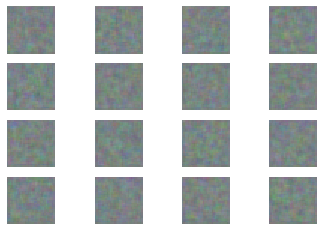

Epoch: 1000 [Disctiminator-Loss: 0.686083]  [Generator-Loss: 0.711293]


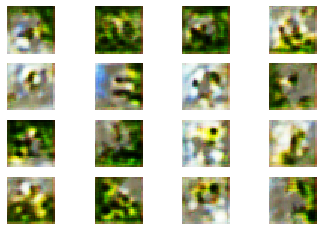

Epoch: 2000 [Disctiminator-Loss: 0.693854]  [Generator-Loss: 0.611163]


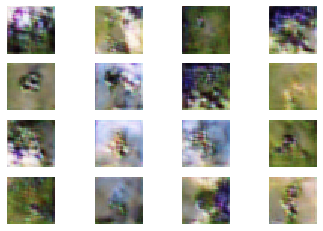

Epoch: 3000 [Disctiminator-Loss: 0.700944]  [Generator-Loss: 0.644362]


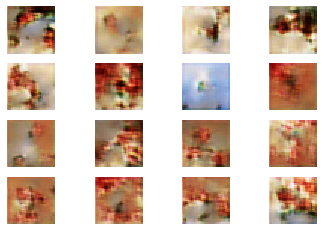

Epoch: 4000 [Disctiminator-Loss: 0.618993]  [Generator-Loss: 0.817371]


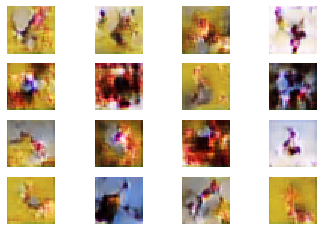

Epoch: 5000 [Disctiminator-Loss: 0.672761]  [Generator-Loss: 0.688946]


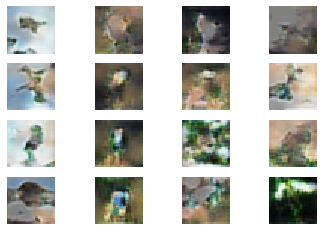

Epoch: 6000 [Disctiminator-Loss: 0.756180]  [Generator-Loss: 0.729191]


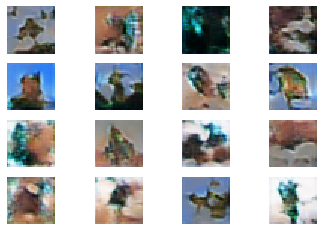

Epoch: 7000 [Disctiminator-Loss: 0.675056]  [Generator-Loss: 0.785811]


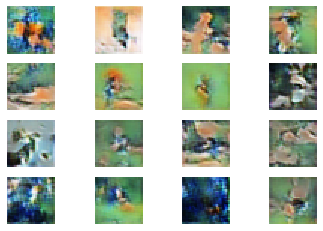

Epoch: 8000 [Disctiminator-Loss: 0.661347]  [Generator-Loss: 0.626953]


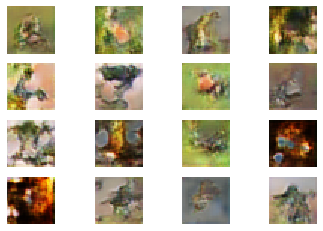

Epoch: 9000 [Disctiminator-Loss: 0.684447]  [Generator-Loss: 0.687360]


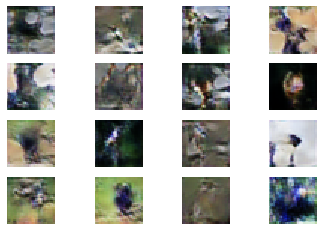

Epoch: 10000 [Disctiminator-Loss: 0.674955]  [Generator-Loss: 0.699610]


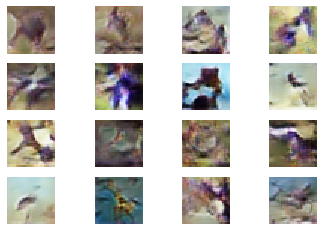

Epoch: 11000 [Disctiminator-Loss: 0.650966]  [Generator-Loss: 0.734335]


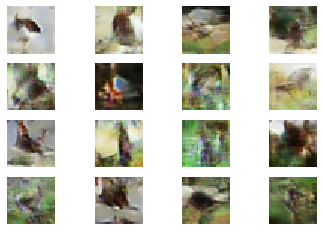

Epoch: 12000 [Disctiminator-Loss: 0.625204]  [Generator-Loss: 0.801266]


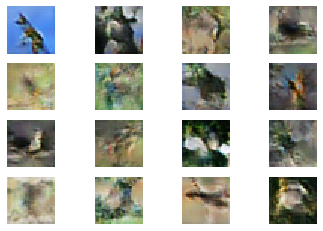

Epoch: 13000 [Disctiminator-Loss: 0.627708]  [Generator-Loss: 0.829171]


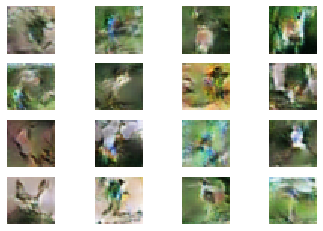

Epoch: 14000 [Disctiminator-Loss: 0.589522]  [Generator-Loss: 0.868878]


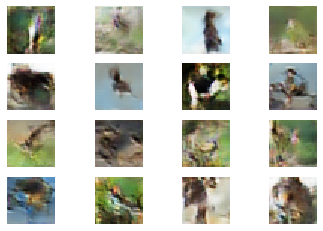

<IPython.core.display.Javascript object>

In [12]:
for epoch in range(epochs):

    # Train Discriminator
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    imgs = X_train[idx]

    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    gen_imgs = generator.predict(noise)

    loss_real = discriminator.train_on_batch(imgs, valid_labels)
    loss_fake = discriminator.train_on_batch(gen_imgs, fake_labels)

    loss = 0.5 * np.add(loss_real, loss_fake)

    # Train Generator

    combined_loss = combined_model.train_on_batch(noise, valid_labels)

    # Plot progress
    if epoch % display_interval == 0:
        print(
            "Epoch: %d [Disctiminator-Loss: %f]  [Generator-Loss: %f]"
            % (epoch, loss[0], combined_loss)
        )
        show_imgs(generator.predict(noise))

    if epoch % 1000 == 0:
        losses.append((loss[0], combined_loss))

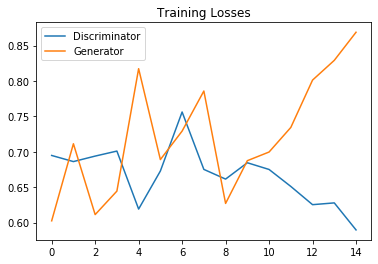

<IPython.core.display.Javascript object>

In [13]:
show_losses(losses)

## Actual images

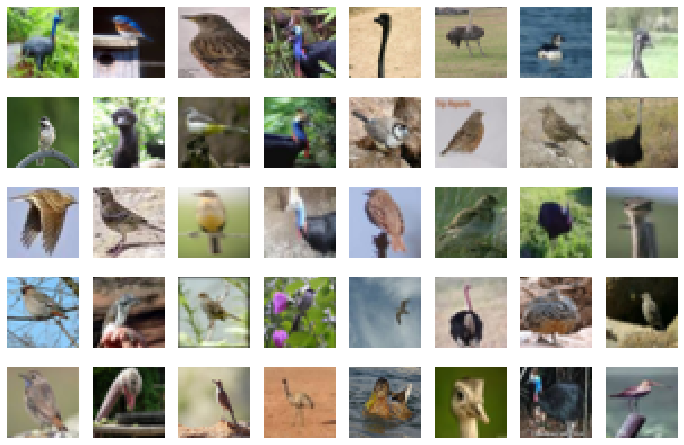

<IPython.core.display.Javascript object>

In [17]:
actual_images = X_train[:40]
actual_images = 0.5 * actual_images + 0.5
f, ax = plt.subplots(5, 8, figsize=(12, 8))
for i, img in enumerate(actual_images):
    ax[i // 8, i % 8].imshow(img)
    ax[i // 8, i % 8].axis("off")

plt.show()

## Generated images

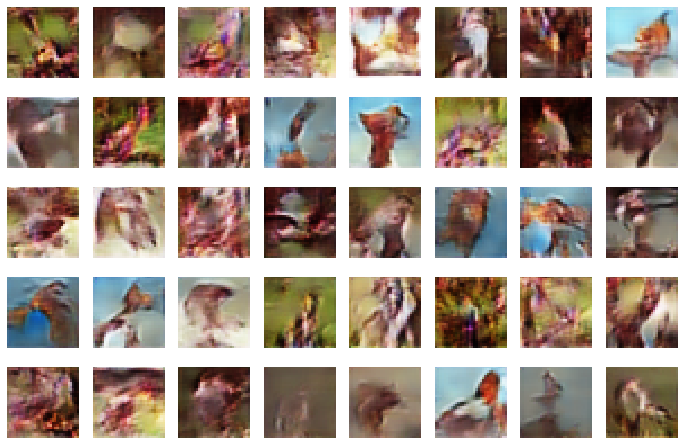

<IPython.core.display.Javascript object>

In [19]:
noise = np.random.normal(size=(40, latent_dim))

generated_images = generator.predict(noise)
generated_images = 0.5 * generated_images + 0.5

f, ax = plt.subplots(5, 8, figsize=(12, 8))
for i, img in enumerate(generated_images):
    ax[i // 8, i % 8].imshow(img)
    ax[i // 8, i % 8].axis("off")

plt.show()